<a href="https://colab.research.google.com/github/shakil1819/NLTK-LSTM-Based-Hate-Speech-Detection/blob/main/LSTM_Twitter_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imorting Libraries

In [21]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
import itertools
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from keras.models import Sequential,Model
from keras.layers import Dense,LSTM, SpatialDropout1D, Embedding
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from joblib import dump, load

# Reading the dataset

In [22]:
text = []
clas = []
df = pd.read_csv('https://raw.githubusercontent.com/shakil1819/NLTK-LSTM-Based-Hate-Speech-Detection/main/Dataset/labeled_data.csv')
text = df['tweet'].tolist()
clas = df['class'].tolist()
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


# creating a new dataframe for easy text processing

In [23]:
df = pd.DataFrame({'tweet': text, 'class': clas})

# Finding if there is any missing data

In [24]:
print(df.isnull().sum())

tweet    0
class    0
dtype: int64


# Converting the data into lower case.

In [25]:
df['tweet'] = df['tweet'].apply(lambda x:x.lower())

# removing punctuations

In [26]:
punctuation_signs = list("?:!.,;")
df['tweet'] = df['tweet']

for punct_sign in punctuation_signs:
    df['tweet'] = df['tweet'].str.replace(punct_sign, '')

<ipython-input-26-b7a77ccdace9>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['tweet'] = df['tweet'].str.replace(punct_sign, '')


# Removing '\n' and '\t', extra spaces, quoting text, and progressive pronouns.

In [27]:
df['tweet'] = df['tweet'].apply(lambda x: x.replace('\n', ' '))
df['tweet'] = df['tweet'].apply(lambda x: x.replace('\t', ' '))
df['tweet'] = df['tweet'].str.replace("    ", " ")
df['tweet'] = df['tweet'].str.replace('"', '')
df['tweet'] = df['tweet'].str.replace("'s", "")

# removing stop-words

In [28]:
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))
for stop_word in stop_words:
    regex_stopword = r"\b" + stop_word + r"\b"
    df['tweet'] = df['tweet'].str.replace(regex_stopword, '')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-28-969333b8111c>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace(regex_stopword, '')


# Using Bag of Words approach for final data Preparation.¶

In [29]:
cv = CountVectorizer(max_features = 75)
X = cv.fit_transform(df['tweet']).toarray()
y = df['class']

# Splitting the Data using Stratified split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 42)

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                              cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Using Random Forest Classifier as the Model and printing evaluating it using confusion matrix

accuracy is:  0.8406186953597848


['rf.joblib']

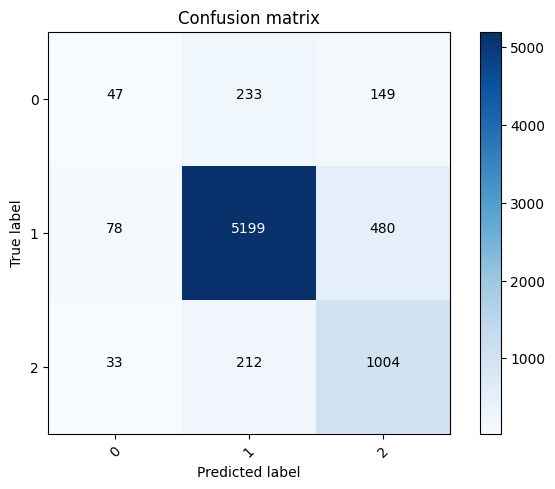

In [32]:
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(CM, classes = range(3))
dump(clf, 'rf.joblib')

# Using Decision tree as the Model and printing evaluating it using confusion matrix

accuracy is:  0.8232683254875588


['decision.joblib']

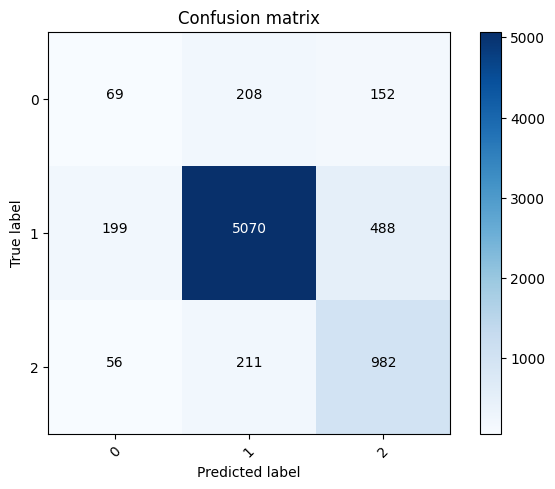

In [33]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(CM, classes = range(3))
dump(clf, 'decision.joblib')

# Using AdaBoost Classifier as the Model and printing evaluating it using confusion matrix

accuracy is:  0.8468056489576328


['ada.joblib']

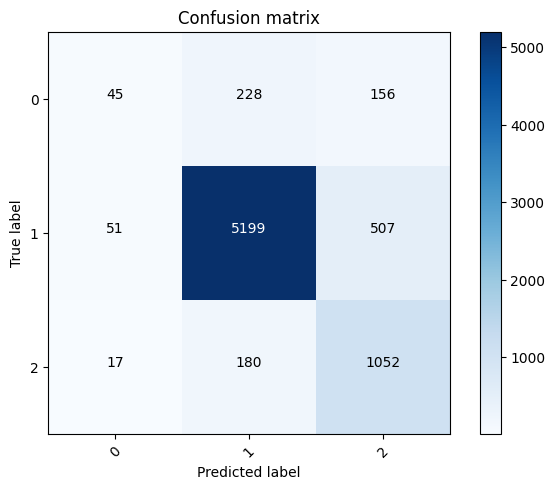

In [34]:
clf = AdaBoostClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(CM, classes = range(3))
dump(clf, 'ada.joblib')

# Converting the labels into categorical format

In [35]:
y_train=to_categorical(y_train, num_classes = 3, dtype='float32')
y_test=to_categorical(y_test, num_classes = 3, dtype='float32')

# Creating and Training an LSTM Model

In [36]:
model = Sequential()
model.add(Embedding(232337, 100, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(20, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 50
batch_size = 64

history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/50
272/272 [==============================] - 108s 370ms/step - loss: 0.4182 - accuracy: 0.7742 - val_loss: 0.4024 - val_accuracy: 0.7743
Epoch 2/50
272/272 [==============================] - 98s 361ms/step - loss: 0.4025 - accuracy: 0.7743 - val_loss: 0.4019 - val_accuracy: 0.7743
Epoch 3/50
272/272 [==============================] - 98s 361ms/step - loss: 0.4021 - accuracy: 0.7743 - val_loss: 0.4012 - val_accuracy: 0.7743
Epoch 4/50
272/272 [==============================] - 104s 381ms/step - loss: 0.4015 - accuracy: 0.7743 - val_loss: 0.4009 - val_accuracy: 0.7743
Epoch 5/50
272/272 [==============================] - 96s 354ms/step - loss: 0.4013 - accuracy: 0.7743 - val_loss: 0.4008 - val_accuracy: 0.7743
Epoch 6/50
272/272 [==============================] - 98s 360ms/step - loss: 0.4012 - accuracy: 0.7743 - val_loss: 0.4006 - val_accuracy: 0.7743
Epoch 7/50
272/272 [==============================] - 97s 356ms/step - loss: 0.4008 - accuracy: 0.7743 - val_loss: 0.4006 - val_

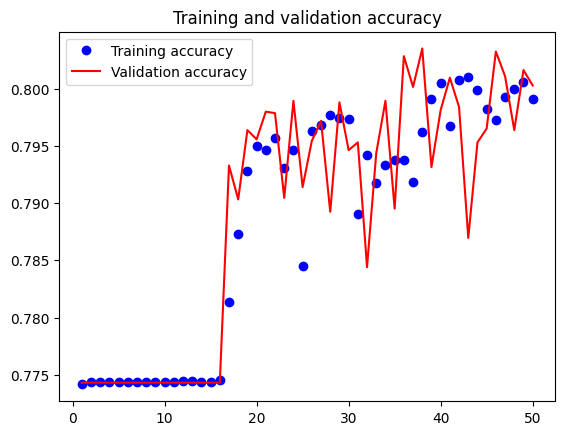

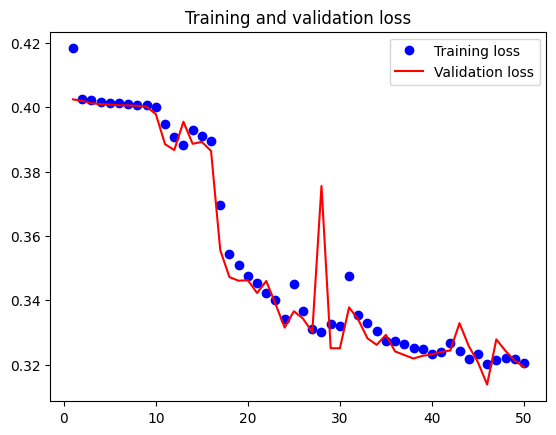

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Saving the LSTM Model

In [38]:
model.save('lstm.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

# Get true labels
y_true = y_test

# Get LSTM predictions
lstm_predictions = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
lstm_accuracy = accuracy_score(y_true, lstm_predictions)

# Get classification report
lstm_report = classification_report(y_true, lstm_predictions)

# Print accuracy
print("LSTM Accuracy:", lstm_accuracy)

# Print classification report
print(lstm_report)

# Get average precision, recall and F1 score
lstm_precision, lstm_recall, lstm_f1, _ = precision_recall_fscore_support(y_true, lstm_predictions, average='macro')

print("Average LSTM Precision:", lstm_precision)
print("Average LSTM Recall:", lstm_recall)
print("Average LSTM F1:", lstm_f1)

233/233 [==============================] - 6s 27ms/step
LSTM Accuracy: 0.7952925353059852
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       429
           1       0.86      0.92      0.89      5757
           2       0.54      0.52      0.53      1249

   micro avg       0.81      0.80      0.80      7435
   macro avg       0.47      0.48      0.47      7435
weighted avg       0.76      0.80      0.78      7435
 samples avg       0.80      0.80      0.80      7435

Average LSTM Precision: 0.4656287552307448
Average LSTM Recall: 0.4769487062060047
Average LSTM F1: 0.47094199848472096


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
